## Loading training data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import  accuracy_score, confusion_matrix, ConfusionMatrixDisplay ,recall_score, precision_score, f1_score, classification_report 
from sklearn.decomposition import PCA
import xgboost as xgb

In [3]:
data = pd.read_csv("data.csv")
data.head()

,ID,air_time1,disp_index1,gmrt_in_air1,gmrt_on_paper1,max_x_extension1,max_y_extension1,mean_acc_in_air1,mean_acc_on_paper1,mean_gmrt1,...,mean_jerk_in_air25,mean_jerk_on_paper25,mean_speed_in_air25,mean_speed_on_paper25,num_of_pendown25,paper_time25,pressure_mean25,pressure_var25,total_time25,class
0,id_1,5160,0.000013,120.804174,86.853334,957,6601,0.361800,0.217459,103.828754,...,0.141434,0.024471,5.596487,3.184589,71,40120,1749.278166,296102.7676,144605,P
1,id_2,51980,0.000016,115.318238,83.448681,1694,6998,0.272513,0.144880,99.383459,...,0.049663,0.018368,1.665973,0.950249,129,126700,1504.768272,278744.2850,298640,P
2,id_3,2600,0.000010,229.933997,172.761858,2333,5802,0.387020,0.181342,201.347928,...,0.178194,0.017174,4.000781,2.392521,74,45480,1431.443492,144411.7055,79025,P
3,id_4,2130,0.000010,369.403342,183.193104,1756,8159,0.556879,0.164502,276.298223,...,0.113905,0.019860,4.206746,1.613522,123,67945,1465.843329,230184.7154,181220,P
4,id_5,2310,0.000007,257.997131,111.275889,987,4732,0.266077,0.145104,184.636510,...,0.121782,0.020872,3.319036,1.680629,92,37285,1841.702561,158290.0255,72575,P


## Data pre-processing

In [5]:
data.shape

(174, 452)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174 entries, 0 to 173
Columns: 452 entries, ID to class
dtypes: float64(300), int64(150), object(2)
memory usage: 614.6+ KB


In [10]:
data.describe()

,air_time1,disp_index1,gmrt_in_air1,gmrt_on_paper1,max_x_extension1,max_y_extension1,mean_acc_in_air1,mean_acc_on_paper1,mean_gmrt1,mean_jerk_in_air1,...,mean_gmrt25,mean_jerk_in_air25,mean_jerk_on_paper25,mean_speed_in_air25,mean_speed_on_paper25,num_of_pendown25,paper_time25,pressure_mean25,pressure_var25,total_time25
count,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,...,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,1.740000e+02
mean,5664.166667,0.000010,297.666685,200.504413,1977.965517,7323.896552,0.416374,0.179823,249.085549,0.067556,...,221.360646,0.148286,0.019934,4.472643,2.871613,85.839080,43109.712644,1629.585962,163061.767360,1.642033e+05
std,12653.772746,0.000003,183.943181,111.629546,1648.306365,2188.290512,0.381837,0.064693,132.698462,0.074776,...,63.762013,0.062207,0.002388,1.501411,0.852809,27.485518,19092.024337,324.142316,56845.610814,4.969397e+05
min,65.000000,0.000002,28.734515,29.935835,754.000000,561.000000,0.067748,0.096631,41.199445,0.011861,...,69.928033,0.030169,0.014987,1.323565,0.950249,32.000000,15930.000000,474.049462,26984.926660,2.998000e+04
25%,1697.500000,0.000008,174.153023,136.524742,1362.500000,6124.000000,0.218209,0.146647,161.136182,0.029523,...,178.798382,0.107732,0.018301,3.485934,2.401199,66.000000,32803.750000,1499.112088,120099.046800,5.917500e+04
50%,2890.000000,0.000009,255.791452,176.494494,1681.000000,6975.500000,0.275184,0.163659,224.445268,0.039233,...,217.431621,0.140483,0.019488,4.510578,2.830672,81.000000,37312.500000,1729.385010,158236.771800,7.611500e+04
75%,4931.250000,0.000011,358.917885,234.052560,2082.750000,8298.500000,0.442706,0.188879,294.392298,0.071057,...,264.310776,0.199168,0.021134,5.212794,3.335828,101.500000,46533.750000,1865.626974,200921.078475,1.275425e+05
max,109965.000000,0.000028,1168.328276,865.210522,18602.000000,15783.000000,2.772566,0.627350,836.784702,0.543199,...,437.373267,0.375078,0.029227,10.416715,5.602909,209.000000,139575.000000,1999.775983,352981.850000,5.704200e+06


In [11]:
data.dtypes

ID                  object
air_time1            int64
disp_index1        float64
gmrt_in_air1       float64
gmrt_on_paper1     float64
                    ...   
paper_time25         int64
pressure_mean25    float64
pressure_var25     float64
total_time25         int64
class               object
Length: 452, dtype: object

In [12]:
data.isnull().sum()

ID                 0
air_time1          0
disp_index1        0
gmrt_in_air1       0
gmrt_on_paper1     0
                  ..
paper_time25       0
pressure_mean25    0
pressure_var25     0
total_time25       0
class              0
Length: 452, dtype: int64

In [13]:
data.drop("ID", axis = 1, inplace = True)

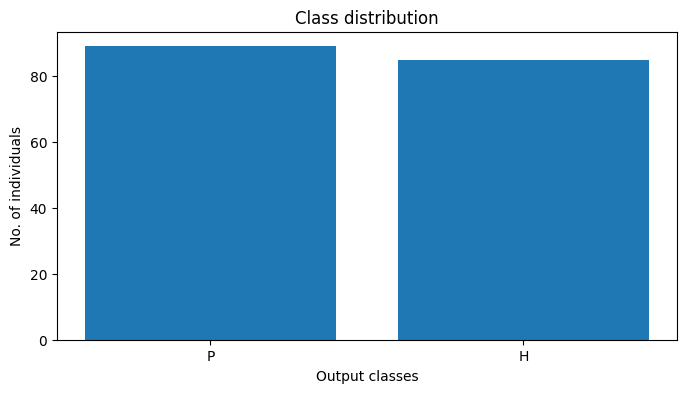

In [18]:
count = data.value_counts("class")

x = count.index
y = count.iloc[:]

fig = plt.figure(figsize=(8, 4))
plt.bar(x, y)
plt.xlabel("Output classes")
plt.ylabel("No. of individuals")
plt.title("Class distribution")
plt.show()

In [20]:
data["class"] = data["class"].replace({"H": 0, "P": 1})

C:\Users\Anjana\AppData\Local\Temp\ipykernel_22328\2974122174.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data["class"] = data["class"].replace({"H": 0, "P": 1})


## Principal component analysis

In [22]:
variances = data.var()
threshold = 0.2

low_variance = variances[variances <= threshold].index
filtered_data = data.drop(columns = low_variance)

filtered_data.shape

(174, 334)

In [24]:
X = filtered_data.drop(["class"], axis = 1)

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [26]:
pca = PCA(n_components = 0.75)
principal_components = pca.fit_transform(X_scaled)

pca_data = pd.DataFrame(data = principal_components, columns = [f'PC{i+1}' for i in range(pca.n_components_)])

pca_data["class"] = filtered_data["class"]

pca_data.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC29,PC30,PC31,PC32,PC33,PC34,PC35,PC36,PC37,class
0,-0.123579,0.332303,-0.351176,-0.483255,0.487280,0.090493,0.210477,-0.980939,-0.065533,-0.726104,...,-0.325673,-0.129855,-1.059084,-0.478149,0.576366,0.278678,-0.428096,-0.061827,0.561037,1
1,-2.762988,0.064246,-0.348668,0.108566,1.061183,0.683490,0.144358,-0.234737,0.099938,0.580639,...,-0.118717,-0.338424,-0.110994,-0.044564,0.107117,-0.157351,0.021695,-0.070222,0.218760,1
2,-0.355816,0.040217,-0.578641,-0.235944,-0.439980,-0.232421,0.657689,0.398746,0.269862,-0.047741,...,-0.069206,-0.054577,0.315979,0.189134,0.149984,0.054308,-0.054373,0.084165,0.105282,1
3,-1.414916,-0.313672,-0.155481,0.321802,0.262193,0.681193,0.369839,0.143979,-0.008916,0.280662,...,0.144484,0.083689,-0.017519,-0.548052,-0.112597,0.102900,0.079625,0.125467,0.138486,1
4,-0.805645,-0.282694,-1.104000,-0.253378,0.225806,0.184931,0.437349,-0.371561,0.258138,-0.044279,...,0.065664,0.263566,0.075960,0.064108,0.044913,-0.048296,0.221405,0.084472,-0.079017,1


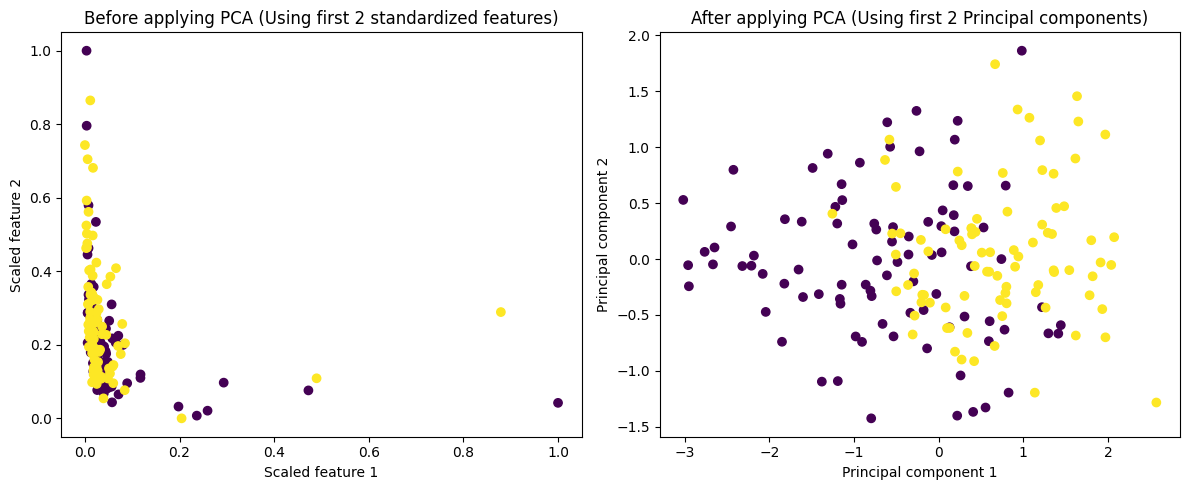

In [58]:
y_numeric = pd.factorize(data["class"])[0]

plt.figure(figsize = (12, 5))

plt.subplot(1, 2, 1)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c = y_numeric)
plt.xlabel("Scaled feature 1")
plt.ylabel("Scaled feature 2")
plt.title("Before applying PCA (Using first 2 standardized features)")

plt.subplot(1, 2, 2)
plt.scatter(pca_data.iloc[:, 0], pca_data.iloc[:, 1], c = y_numeric)
plt.xlabel("Principal component 1")
plt.ylabel("Principal component 2")
plt.title("After applying PCA (Using first 2 Principal components)")

plt.tight_layout()
plt.show()

## Model training

In [60]:
X = pca_data.drop("class", axis = 1)
y = pca_data["class"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [62]:
model = xgb.XGBClassifier(objective = 'binary:logistic', max_depth = 4, learning_rate = 0.01, n_estimators = 400)
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.01, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=4,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=400,
              n_jobs=None, num_parallel_tree=None, ...)

## Model prediction

              precision    recall  f1-score   support

           0       0.93      0.93      0.93        15
           1       0.95      0.95      0.95        20

    accuracy                           0.94        35
   macro avg       0.94      0.94      0.94        35
weighted avg       0.94      0.94      0.94        35



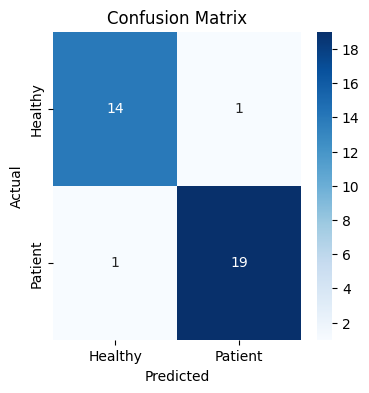

In [64]:
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

plt.figure(figsize = (4, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot = True, fmt = "d", cmap = "Blues",
            xticklabels = ["Healthy", "Patient"],
            yticklabels = ["Healthy", "Patient"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()